# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/data_df.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)
api_key

'e2ab951ed34af89ed9a79e83f9faf65c'

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)



609

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

counter = 1
set = 1
query_url = f"{url}appid={api_key}&units={units}&q="
lat =[]
lng = []
temp = []
humidity = []
cloudiness = []
wind_speed = []
city = []
country = []
date = []
temp_max=[]

for x in cities:
    try:
        response = requests.get(query_url + x)
        data = response.json()
        lat.append(data["coord"]["lat"])
        lng.append(data["coord"]["lon"])
        temp.append(data["main"]["temp"])
        temp_max.append(data["main"]["temp_max"])
        humidity.append(data["main"]["humidity"])
        cloudiness.append(data["clouds"]["all"])
        wind_speed.append(data["wind"]["speed"])
        city.append(data["name"])
        country.append(data["sys"]["country"])
        date.append(data["dt"])
        
        print(f"Processing Record {counter} of set {set} | {x}" )
       
        if counter < 50:
            counter = counter + 1
        else:
            set = set + 1
            counter=1
                 
    except:
        print("city not found. skipping.....")
print("------------------------------\nData Retrieval Complete\n------------------------------")



Processing Record 1 of set 1 | lavrentiya
Processing Record 2 of set 1 | trincomalee
Processing Record 3 of set 1 | palu
Processing Record 4 of set 1 | georgetown
Processing Record 5 of set 1 | kavaratti
city not found. skipping.....
city not found. skipping.....
Processing Record 6 of set 1 | puerto ayora
Processing Record 7 of set 1 | yellowknife
Processing Record 8 of set 1 | caxito
Processing Record 9 of set 1 | hithadhoo
Processing Record 10 of set 1 | pevek
Processing Record 11 of set 1 | punta arenas
Processing Record 12 of set 1 | iqaluit
Processing Record 13 of set 1 | rikitea
Processing Record 14 of set 1 | deloraine
Processing Record 15 of set 1 | sterling
Processing Record 16 of set 1 | ilave
Processing Record 17 of set 1 | cape town
city not found. skipping.....
Processing Record 18 of set 1 | tuktoyaktuk
city not found. skipping.....
Processing Record 19 of set 1 | san felipe
Processing Record 20 of set 1 | mogadishu
Processing Record 21 of set 1 | saldanha
Processing Rec

Processing Record 35 of set 4 | minab
Processing Record 36 of set 4 | sao joao da barra
Processing Record 37 of set 4 | karpathos
Processing Record 38 of set 4 | avarua
Processing Record 39 of set 4 | santo antonio do monte
Processing Record 40 of set 4 | victoria
Processing Record 41 of set 4 | dingle
Processing Record 42 of set 4 | irbeyskoye
Processing Record 43 of set 4 | soe
city not found. skipping.....
Processing Record 44 of set 4 | beyneu
Processing Record 45 of set 4 | hun
Processing Record 46 of set 4 | rodrigues alves
Processing Record 47 of set 4 | kiama
Processing Record 48 of set 4 | coquimbo
Processing Record 49 of set 4 | kargil
Processing Record 50 of set 4 | sicamous
Processing Record 1 of set 5 | avera
Processing Record 2 of set 5 | prainha
Processing Record 3 of set 5 | port lincoln
Processing Record 4 of set 5 | keti bandar
Processing Record 5 of set 5 | pilar de la horadada
Processing Record 6 of set 5 | las vegas
Processing Record 7 of set 5 | provideniya
Proces

Processing Record 21 of set 8 | san roque
city not found. skipping.....
Processing Record 22 of set 8 | icod de los vinos
Processing Record 23 of set 8 | ampanihy
Processing Record 24 of set 8 | presidencia roque saenz pena
Processing Record 25 of set 8 | muravlenko
Processing Record 26 of set 8 | egvekinot
Processing Record 27 of set 8 | isangel
Processing Record 28 of set 8 | jiuquan
Processing Record 29 of set 8 | kabinda
Processing Record 30 of set 8 | soloneshnoye
Processing Record 31 of set 8 | mehamn
Processing Record 32 of set 8 | padang
Processing Record 33 of set 8 | belaya gora
Processing Record 34 of set 8 | miles city
Processing Record 35 of set 8 | nanticoke
Processing Record 36 of set 8 | dillon
Processing Record 37 of set 8 | denpasar
Processing Record 38 of set 8 | okato
Processing Record 39 of set 8 | hovd
Processing Record 40 of set 8 | saskylakh
city not found. skipping.....
Processing Record 41 of set 8 | acapulco
Processing Record 42 of set 8 | ankara
Processing R

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
new_data = {
    "City": city,
    "Cloudiness":cloudiness,
    "Country":country,
    "Date":date,
    "Humidity":humidity,
    "Lat": lat,
    "Lng":lng,
    "Max Temp":temp_max,
    "Wind Speed": wind_speed
}

data_df = pd.DataFrame(new_data)
data_df.to_csv("../output_data_file.csv")

data_df.head()
len(city)

549

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

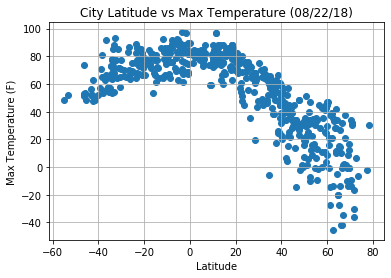

In [9]:
plt.scatter(lat,temp_max)
plt.title("City Latitude vs Max Temperature (08/22/18)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()
plt.savefig("../Images/Temp_InCities.png")


#### Latitude vs. Humidity Plot

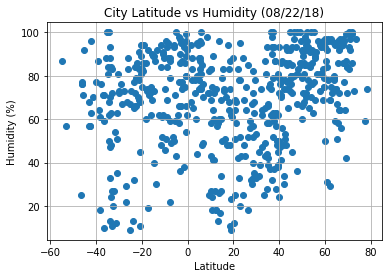

In [10]:
plt.scatter(lat,humidity)
plt.title("City Latitude vs Humidity (08/22/18)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.savefig("../Images/Humidity_InCities.png")

#### Latitude vs. Cloudiness Plot

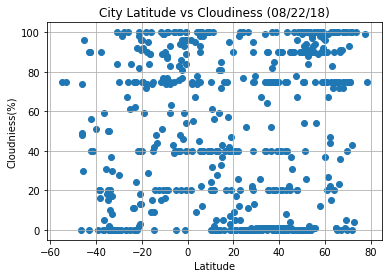

In [11]:
plt.scatter(lat,cloudiness)
plt.title("City Latitude vs Cloudiness (08/22/18)")
plt.xlabel("Latitude")
plt.ylabel("Cloudniess(%)")
plt.grid()
plt.savefig("../Images/cloudiness_InCities.png")

#### Latitude vs. Wind Speed Plot

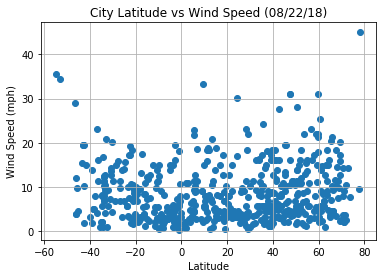

In [12]:
plt.scatter(lat,wind_speed)
plt.title("City Latitude vs Wind Speed (08/22/18)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
plt.savefig("../Images/windspeed_InCities.png")

Observations: 

1.) Temperature and latitude seems to have clear relationship.As you move closer to the Equator, the temperature gets significantly higher. 

2.) Based this time period, the southern hemisphere gets warmer wile the temparture in the northern hemisphere gets colder. 

3.) There seems to be clear relationship between latitude and cloudiness,wind speed or humiditity. However, there are a few cluster in the Humidity chart. 
